In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('./data.csv', sep = ";")

In [4]:
data = data.drop(columns = ['Unnamed: 0'])

In [5]:
data.tail()

,Medida,1,2,3,4,5,6,7,8,9,10
7,Massa (g),1.150000,1.150000,1.160000,1.150000,1.160000,1.160000,1.160000,1.150000,1.15000,1.170000
8,Comprimento (mm),66.796310,66.796310,67.377147,66.796310,67.377147,67.377147,67.377147,66.796310,66.79631,67.957985
9,Diâmetro (mm),19.700000,19.900000,20.000000,19.450000,19.600000,19.400000,19.750000,19.800000,19.65000,19.600000
10,Massa (g),1.130000,1.130000,1.130000,1.120000,1.120000,1.130000,1.110000,1.120000,1.11000,1.120000
11,Comprimento (mm),65.634635,65.634635,65.634635,65.053797,65.053797,65.634635,64.472960,65.053797,64.47296,65.053797


In [6]:
data['Anel'] = pd.Series([15,15,15,4,4,4,11,11,11,7,7,7])

In [7]:
data = data.set_index(['Anel', 'Medida'])

In [8]:
caracteristicas = data.copy().drop(columns = ['1','2','3','4','5','6','7','8','9','10'])
caracteristicas['1º Quartil'] = data.apply(lambda row: row.quantile(q = 0.25), axis = 1)
caracteristicas['Mediana'] = data.apply(lambda row: row.median(), axis = 1)
caracteristicas['Média'] = data.apply(lambda row: row.mean(), axis = 1)
caracteristicas['3º Quartil'] = data.apply(lambda row: row.quantile(q = 0.75), axis = 1)
caracteristicas['Interquartil'] = data.apply(lambda row: stats.iqr(row), axis = 1)
caracteristicas['Curtose'] = data.apply(lambda row: row.kurtosis(), axis = 1)

In [9]:
caracteristicas # copiar e colocar no tablegenerator do latex
# pra salvar como csv
# caracteristicas.to_csv('./caracteristicas.csv')

1º Quartil    Mediana      Média  3º Quartil  \
Anel Medida                                                           
15   Diâmetro (mm)      19.100000  19.300000  19.300000   19.462500   
     Massa (g)           1.122500   1.130000   1.129000    1.130000   
     Comprimento (mm)   65.199007  65.634635  65.576551   65.634635   
4    Diâmetro (mm)      20.050000  20.250000  20.175000   20.250000   
     Massa (g)           1.110000   1.120000   1.114000    1.120000   
     Comprimento (mm)   64.472960  65.053797  64.705295   65.053797   
11   Diâmetro (mm)      20.500000  20.550000  20.555000   20.600000   
     Massa (g)           1.150000   1.155000   1.156000    1.160000   
     Comprimento (mm)   66.796310  67.086729  67.144812   67.377147   
7    Diâmetro (mm)      19.600000  19.675000  19.685000   19.787500   
     Massa (g)           1.120000   1.120000   1.122000    1.130000   
     Comprimento (mm)   65.053797  65.053797  65.169965   65.634635   

                       Interquartil   Curtose  
Anel Medida                                    
15   Diâmetro (mm)         0.362500  0.699836  
     Massa (g)             0.007500  3.613287  
     Comprimento (mm)      0.435628  3.613287  
4    Diâmetro (mm)         0.200000 -1.121187  
     Massa (g)             0.010000 -0.665458  
     Comprimento (mm)      0.580837 -0.665458  
11   Diâmetro (mm)         0.100000  0.438398  
     Massa (g)             0.010000 -0.146104  
     Comprimento (mm)      0.580837 -0.146104  
7    Diâmetro (mm)         0.187500 -0.438581  
     Massa (g)             0.010000 -1.074162  
     Comprimento (mm)      0.580837 -1.074162

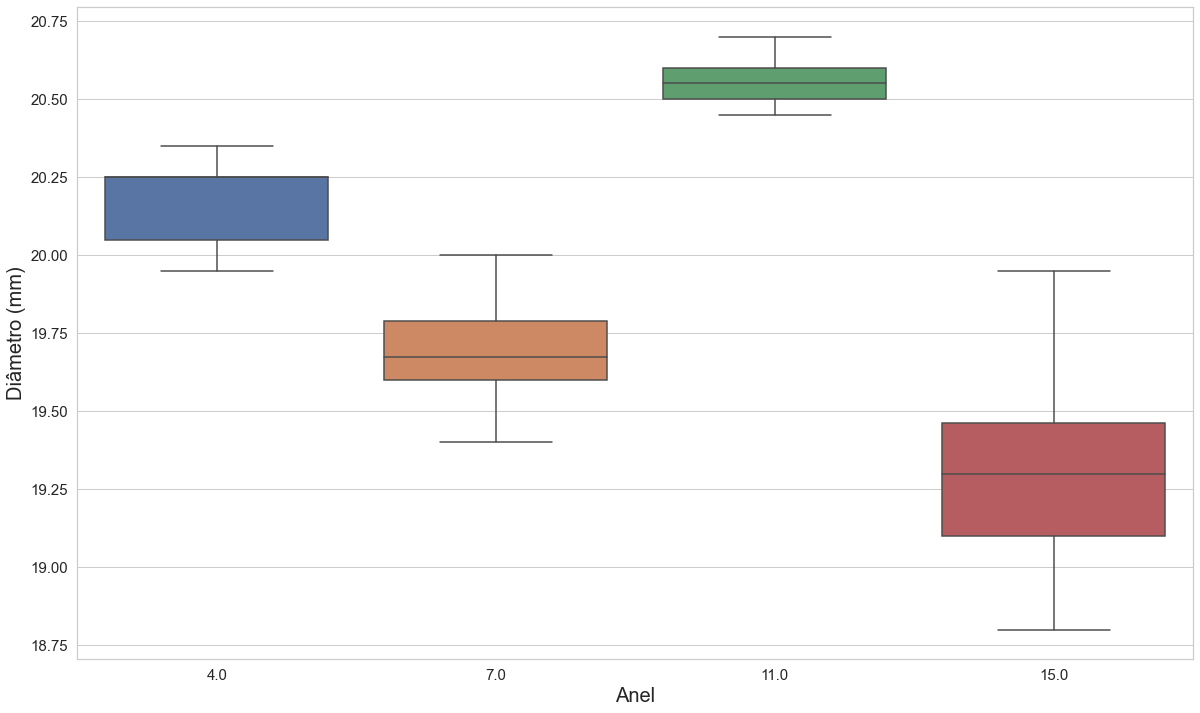

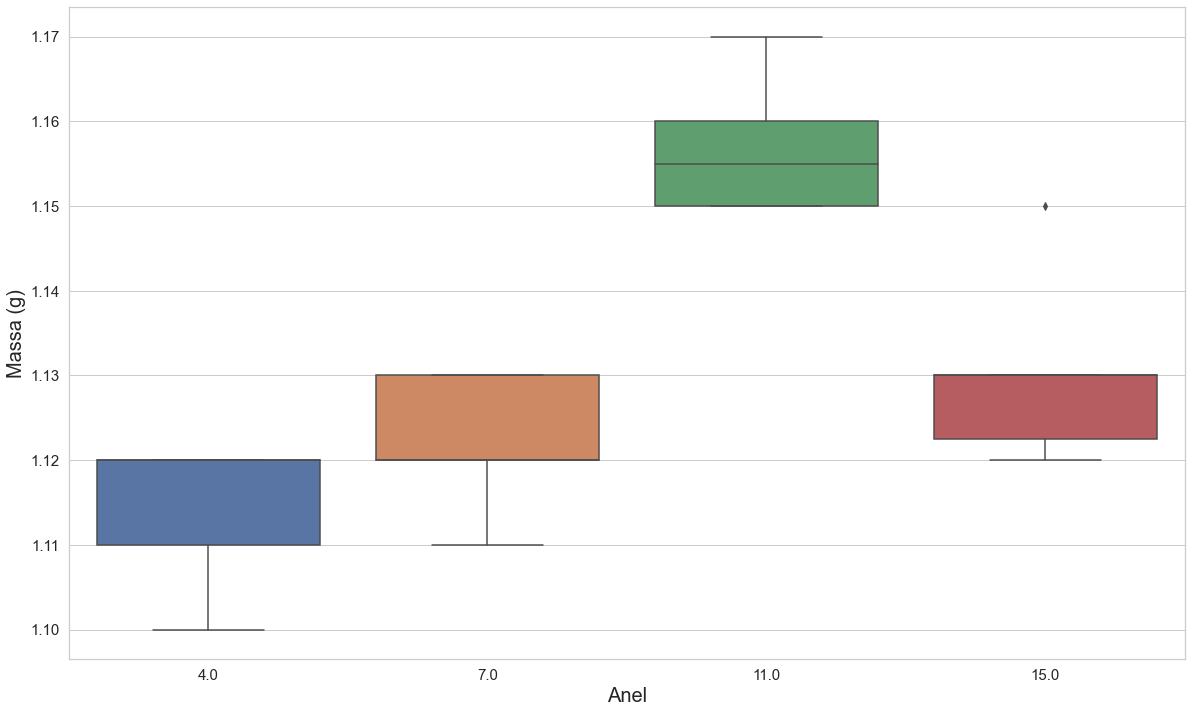

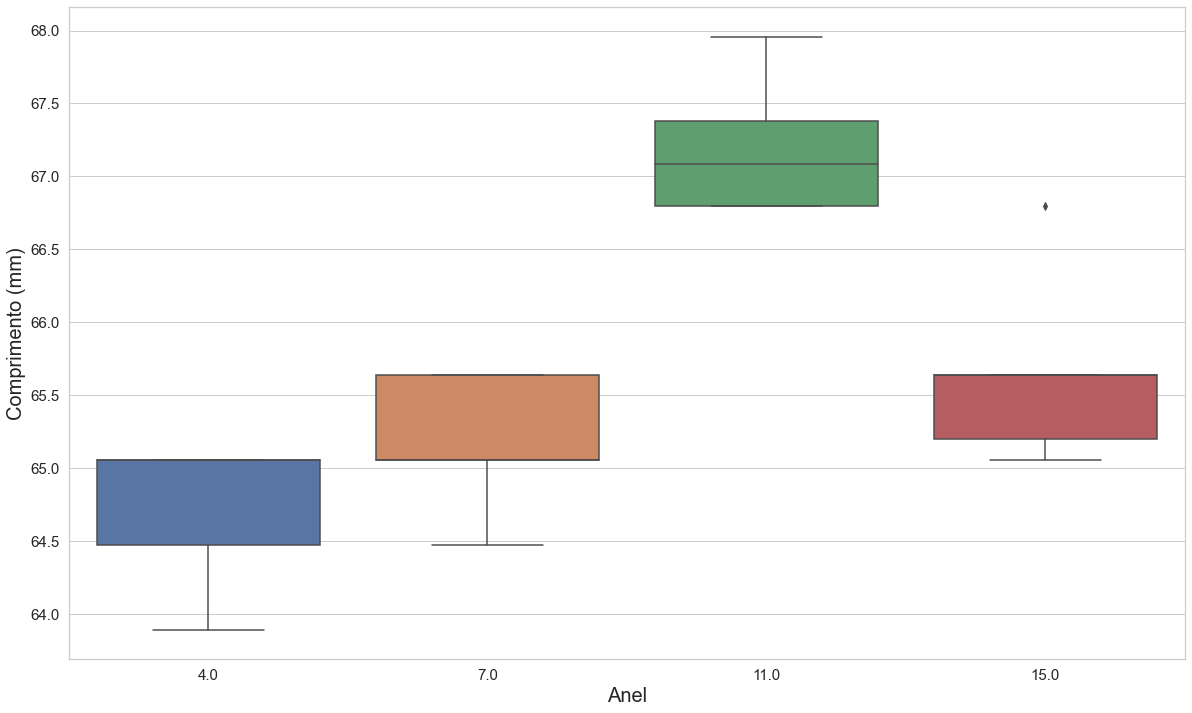

In [10]:
for medida in ['Diâmetro (mm)', 'Massa (g)', 'Comprimento (mm)']:
    df_medida = data.reset_index().loc[data.reset_index()['Medida'] == medida].drop(columns = ['Medida']).T
    df_medida = df_medida.rename(columns=df_medida.iloc[0]).drop(df_medida.index[0]).reset_index()
    df_medida = pd.melt(df_medida, id_vars=['index'], value_vars=[15.,4.,11.,7.])
    df_medida['index'] = df_medida['index'].apply(lambda x: int(x))
    df_medida.columns = ['Medição', 'Anel', medida]

    plt.figure(figsize=(20, 12))
    sns.set(style="whitegrid")
    ax = sns.boxplot(x="Anel", y=medida, data=df_medida)
    ax.set_xlabel("Anel",fontsize=20)
    ax.set_ylabel(medida,fontsize=20)
    ax.tick_params(labelsize=15)
    plt.savefig(f'boxplot_{medida}.png', dpi=500)

In [11]:
def mean_confidence_interval(data, confidence=0.95):
#     print(data)
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return [m, m-h, m+h]

In [13]:
ci = data.copy().drop(columns = ['1','2','3','4','5','6','7','8','9','10'])
ci['aux'] = data.apply(lambda row: mean_confidence_interval(row), axis = 1)
ci['Intervalo Superior'] = ci['aux'].apply(lambda x: x[2])
ci['Média'] = ci['aux'].apply(lambda x: x[0])
ci['Intervalo Inferior'] = ci['aux'].apply(lambda x: x[1])
ci = ci.drop(columns = ['aux'])

In [14]:
ci

Intervalo Superior      Média  Intervalo Inferior
Anel Medida                                                             
15   Diâmetro (mm)              19.534242  19.300000           19.065758
     Massa (g)                   1.135264   1.129000            1.122736
     Comprimento (mm)           65.940366  65.576551           65.212736
4    Diâmetro (mm)              20.281972  20.175000           20.068028
     Massa (g)                   1.120032   1.114000            1.107968
     Comprimento (mm)           65.055680  64.705295           64.354909
11   Diâmetro (mm)              20.606833  20.555000           20.503167
     Massa (g)                   1.161002   1.156000            1.150998
     Comprimento (mm)           67.435337  67.144812           66.854288
7    Diâmetro (mm)              19.818884  19.685000           19.551116
     Massa (g)                   1.127643   1.122000            1.116357
     Comprimento (mm)           65.497721  65.169965           64.842209

In [15]:
data

1          2          3          4          5  \
Anel Medida                                                                    
15   Diâmetro (mm)     19.250000  19.300000  19.950000  19.500000  19.050000   
     Massa (g)          1.150000   1.120000   1.130000   1.130000   1.130000   
     Comprimento (mm)  66.796310  65.053797  65.634635  65.634635  65.634635   
4    Diâmetro (mm)     20.350000  20.250000  20.200000  19.950000  20.250000   
     Massa (g)          1.120000   1.120000   1.120000   1.120000   1.110000   
     Comprimento (mm)  65.053797  65.053797  65.053797  65.053797  64.472960   
11   Diâmetro (mm)     20.600000  20.700000  20.550000  20.500000  20.450000   
     Massa (g)          1.150000   1.150000   1.160000   1.150000   1.160000   
     Comprimento (mm)  66.796310  66.796310  67.377147  66.796310  67.377147   
7    Diâmetro (mm)     19.700000  19.900000  20.000000  19.450000  19.600000   
     Massa (g)          1.130000   1.130000   1.130000   1.120000   1.120000   
     Comprimento (mm)  65.634635  65.634635  65.634635  65.053797  65.053797   

                               6          7          8          9         10  
Anel Medida                                                                   
15   Diâmetro (mm)     18.950000  19.350000  19.300000  19.550000  18.800000  
     Massa (g)          1.130000   1.120000   1.130000   1.120000   1.130000  
     Comprimento (mm)  65.634635  65.053797  65.634635  65.053797  65.634635  
4    Diâmetro (mm)     20.000000  20.300000  20.250000  20.250000  19.950000  
     Massa (g)          1.120000   1.120000   1.100000   1.110000   1.100000  
     Comprimento (mm)  65.053797  65.053797  63.892122  64.472960  63.892122  
11   Diâmetro (mm)     20.500000  20.600000  20.550000  20.600000  20.500000  
     Massa (g)          1.160000   1.160000   1.150000   1.150000   1.170000  
     Comprimento (mm)  67.377147  67.377147  66.796310  66.796310  67.957985  
7    Diâmetro (mm)     19.400000  19.750000  19.800000  19.650000  19.600000  
     Massa (g)          1.130000   1.110000   1.120000   1.110000   1.120000  
     Comprimento (mm)  65.634635  64.472960  65.053797  64.472960  65.053797